In [55]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io
import IPython.display as ipd

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

In [5]:
## This code loads digits, but you'll have to rework it to fit into torch's data loader
res = 28
digits = []
for i in range(10):
    digits.append([])
    I = skimage.io.imread("Digits/{}.png".format(i))/255.0
    row = 0
    col = 0
    while row < I.shape[0]:
        col = 0
        while col < I.shape[1]:
            img = I[row:row+res, col:col+res]
            if np.sum(img) > 0:
                digits[i].append(img)
            col += res
        row += res
    print(len(digits[i]), "unique ", i, " digits")
    

5923 unique  0  digits
6742 unique  1  digits
5958 unique  2  digits
6131 unique  3  digits
5842 unique  4  digits
5421 unique  5  digits
5918 unique  6  digits
6265 unique  7  digits
5851 unique  8  digits
5949 unique  9  digits


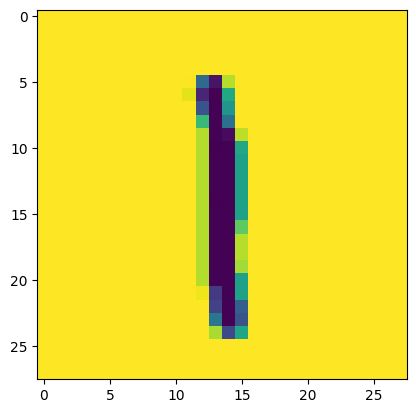

In [6]:
plt.imshow(digits[1][3])

In [39]:
class DigitsData(Dataset):
    def __init__(self, folderpath):
        """
        This code loads digits, but you'll have to rework it to fit into torch's data loader
        """
        res = 28
        digits = []
        for i in range(10):
            digits.append([])
            I = skimage.io.imread("{}/{}.png".format(folderpath, i))/255.0
            row = 0
            col = 0
            while row < I.shape[0]:
                col = 0
                while col < I.shape[1]:
                    img = I[row:row+res, col:col+res]
                    if np.sum(img) > 0:
                        digits[i].append(img)
                    col += res
                row += res
            #print(len(digits[i]), "unique ", i, " digits")
        self.digits = digits # sotre as instance variable

    
    def __len__(self):
        return sum([len(digit) for digit in self.digits])
    
    def __getitem__(self, i):
        ## TODO: Return x, y
        ## where x is a flattened digit as a torch tensor, and y is its ID
        ## return the ith digit in the collection, as well as its label
        y = 0
        while i - len(self.digits[y]) >= 0:
            i -= len(self.digits[y])
            y += 1
        x = np.array(self.digits[y][i], dtype=np.float32)
        yk = np.zeros(10, dtype=np.float32) ## one hot vector
        yk[y] = 1
        return torch.from_numpy(x).flatten(), torch.from_numpy(yk)

training = DigitsData("Digits")
testing = DigitsData("DigitsTest")
loader = DataLoader(training, batch_size=16, shuffle=True)

"""x, y = training[0]
x = x.view(28,28)
plt.imshow(x) # wow!!"""

'x, y = training[0]\nx = x.view(28,28)\nplt.imshow(x) # wow!!'

In [40]:

X, Y = next(iter(loader))

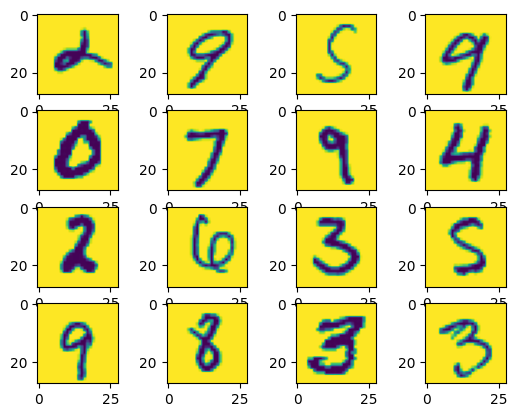

In [30]:
for k in range(X.shape[0]):
    plt.subplot(4,4, k+1)
    plt.imshow(torch.reshape(X[k, :], (28,28)))

In [41]:
i = 0
for X, Y in loader:
    i += 1
print(i)

3750


In [46]:
linear = nn.Linear(28*28, 10)
#print(linear)

for p in linear.parameters():
    print(p.shape, p)
    

torch.Size([10, 784]) Parameter containing:
tensor([[-0.0313, -0.0106, -0.0143,  ...,  0.0014, -0.0217, -0.0167],
        [ 0.0062,  0.0349,  0.0182,  ...,  0.0255, -0.0119,  0.0218],
        [ 0.0145, -0.0339, -0.0262,  ..., -0.0236, -0.0300,  0.0038],
        ...,
        [ 0.0134, -0.0206,  0.0269,  ...,  0.0193, -0.0157, -0.0051],
        [ 0.0328,  0.0059,  0.0144,  ...,  0.0252, -0.0231,  0.0345],
        [ 0.0129, -0.0065,  0.0219,  ...,  0.0324,  0.0171, -0.0079]],
       requires_grad=True)
torch.Size([10]) Parameter containing:
tensor([ 0.0050,  0.0145, -0.0305,  0.0090, -0.0320,  0.0072,  0.0092, -0.0190,
        -0.0018,  0.0185], requires_grad=True)


In [50]:
def softmax(u):
    """
    Implement the softmax method

    Parameters
    ----------
    u: ndarray(N)
      Input to softmax
      
    Returns
    -------
    ndarray
        Result of softmax
    """
    exp_u = np.exp(u)
    return exp_u / np.sum(exp_u)

In [ ]:
## minibatch gradient descent
device = "cuda"

optimizer = torch.optim.Adam(linear.parameters(), lr=1e-6) ## lr (learning rate) = 0.001
loss_fn = nn.BCEWithLogitsLoss()

n_epochs = 50
losses = np.zeros(n_epochs)
for epoch in range(n_epochs):
    # a loop throuht the entire dataset
    loader = DataLoader(training, batch_size=16, shuffle=True)
    # loop through each batch in the training data
    total_loss = 0
    for X, Y in loader:
        # evalute the model on X
        Y_est = linear(X)
        loss = loss_fn(Y_est, Y)
        loss.backward() # compute the gradients (derivatives)
        optimizer.step() # does the gradient descent
        optimizer.zero_grad() # clear the gradient for the next batch
        total_loss += loss.item() # add on the value
    losses[epoch] = total_loss
    ipd.clear_output()
    print("epoch {}, loss {}".format(epoch, losses[epoch]))

epoch 10, loss 231.4354212861508


Text(0, 0.5, 'loss')

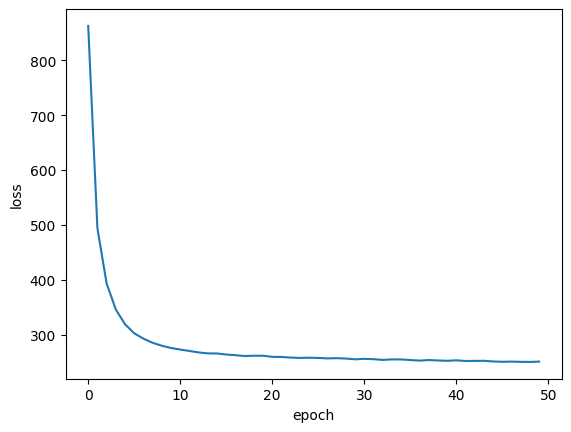

In [60]:
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("loss")

In [58]:
loader = DataLoader(testing, batch_size=16, shuffle=True)
# loop through each batch in the training data
test_loss = 0
total_correct = 0
for X, Y in loader:
    # evalute the model on X
    Y_est = linear(X)
    test_loss += loss_fn(Y_est, Y)
    Y_est = torch.softmax(Y_est, dim=1)
    total_correct += torch.sum(torch.round(Y_est) == )

SyntaxError: invalid syntax (4250574630.py, line 10)

## dumb testing to make sure it works

In [10]:
print(len(training))
print(len(testing))

60000
10000


Text(0.5, 1.0, 'tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])')

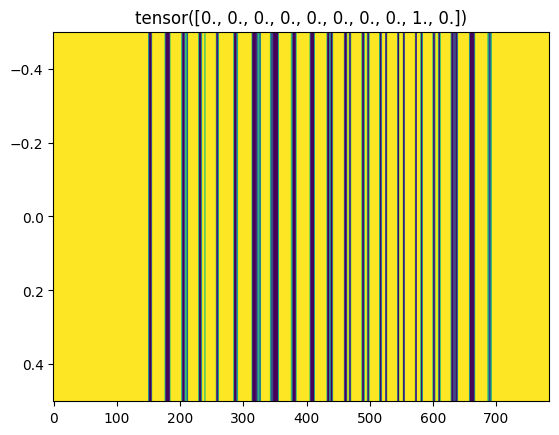

In [11]:
x, y = training[50000]
plt.imshow(x[None, :], aspect='auto')
plt.title("{}".format(y))